# <span style= 'color:blue'><h1> Partie 1:training pipeline (dont run it it take so much time with cpu just run the importations )</h1> </span>
---

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import imutils
from imutils.contours import sort_contours
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
mnist = keras.datasets.mnist
(train_images_mnist,train_labels_mnist),(test_images_mnist,test_labels_mnist) = mnist.load_data()
# images are reshaped to be used by the flow method of a keras ImageGenerator
train_images_mnist = np.reshape(train_images_mnist,(train_images_mnist.shape[0],28,28,1))  
test_images_mnist = np.reshape(test_images_mnist,(test_images_mnist.shape[0],28,28,1))

In [3]:
az_data_path = 'datasets/handwritingdataset'
AZ_data = pd.read_csv(az_data_path +'/AZ_Handwritten_Data.csv',header = None)
# the first column contains label values, while the remaining are the flattened array of 28 x 28 image pixels
AZ_labels = AZ_data.values[:,0]
AZ_images = AZ_data.values[:,1:]
# images are reshaped to be used by the flow method of a keras ImageGenerator
AZ_images = np.reshape(AZ_images,(AZ_images.shape[0],28,28,1))  

In [4]:
test_size = float(len(test_labels_mnist))/len(train_labels_mnist)
print(f'test set size: {test_size}')
train_images_AZ, test_images_AZ, train_labels_AZ, test_labels_AZ = train_test_split(AZ_images,AZ_labels, test_size=test_size)
#shift mnist labels 
train_labels_mnist = train_labels_mnist + max(AZ_labels)+1
test_labels_mnist = test_labels_mnist + max(AZ_labels)+1

# concatenate datasets
train_images = np.concatenate((train_images_AZ,train_images_mnist),axis=0)
train_labels = np.concatenate((train_labels_AZ,train_labels_mnist))
test_images = np.concatenate((test_images_AZ,test_images_mnist),axis=0)
test_labels = np.concatenate((test_labels_AZ,test_labels_mnist))

print('Data ready')

test set size: 0.16666666666666666
Data ready


In [5]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(len(np.unique(train_labels)), activation='softmax')  
])

model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 512)               4

In [6]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow(train_images, train_labels, batch_size=50, shuffle=True)
validation_generator = test_datagen.flow(test_images, test_labels, batch_size=50, shuffle=True)

In [8]:
history = model.fit(
      train_generator,
      steps_per_epoch=1000,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  
      verbose=2)
model.save('model_v2')

Epoch 1/100
1000/1000 - 16s - loss: 1.9250 - accuracy: 0.4839 - val_loss: 0.6742 - val_accuracy: 0.8228 - 16s/epoch - 16ms/step
Epoch 2/100
1000/1000 - 15s - loss: 1.0431 - accuracy: 0.7107 - val_loss: 0.4294 - val_accuracy: 0.8864 - 15s/epoch - 15ms/step
Epoch 3/100
1000/1000 - 15s - loss: 0.7720 - accuracy: 0.7825 - val_loss: 0.3040 - val_accuracy: 0.9200 - 15s/epoch - 15ms/step
Epoch 4/100
1000/1000 - 15s - loss: 0.6323 - accuracy: 0.8201 - val_loss: 0.2651 - val_accuracy: 0.9224 - 15s/epoch - 15ms/step
Epoch 5/100
1000/1000 - 16s - loss: 0.5499 - accuracy: 0.8422 - val_loss: 0.2908 - val_accuracy: 0.9120 - 16s/epoch - 16ms/step
Epoch 6/100
1000/1000 - 15s - loss: 0.4992 - accuracy: 0.8568 - val_loss: 0.2389 - val_accuracy: 0.9352 - 15s/epoch - 15ms/step
Epoch 7/100
1000/1000 - 15s - loss: 0.4544 - accuracy: 0.8690 - val_loss: 0.2365 - val_accuracy: 0.9332 - 15s/epoch - 15ms/step
Epoch 8/100
1000/1000 - 15s - loss: 0.4257 - accuracy: 0.8754 - val_loss: 0.2171 - val_accuracy: 0.9320 

Epoch 65/100
1000/1000 - 15s - loss: 0.2583 - accuracy: 0.9230 - val_loss: 0.1451 - val_accuracy: 0.9552 - 15s/epoch - 15ms/step
Epoch 66/100
1000/1000 - 15s - loss: 0.2544 - accuracy: 0.9239 - val_loss: 0.2053 - val_accuracy: 0.9460 - 15s/epoch - 15ms/step
Epoch 67/100
1000/1000 - 16s - loss: 0.2596 - accuracy: 0.9227 - val_loss: 0.1505 - val_accuracy: 0.9556 - 16s/epoch - 16ms/step
Epoch 68/100
1000/1000 - 15s - loss: 0.2627 - accuracy: 0.9220 - val_loss: 0.1730 - val_accuracy: 0.9468 - 15s/epoch - 15ms/step
Epoch 69/100
1000/1000 - 15s - loss: 0.2523 - accuracy: 0.9239 - val_loss: 0.2281 - val_accuracy: 0.8872 - 15s/epoch - 15ms/step
Epoch 70/100
1000/1000 - 15s - loss: 0.2596 - accuracy: 0.9221 - val_loss: 0.1654 - val_accuracy: 0.9520 - 15s/epoch - 15ms/step
Epoch 71/100
1000/1000 - 15s - loss: 0.2546 - accuracy: 0.9234 - val_loss: 0.1832 - val_accuracy: 0.9468 - 15s/epoch - 15ms/step
Epoch 72/100
1000/1000 - 15s - loss: 0.2665 - accuracy: 0.9209 - val_loss: 0.1838 - val_accuracy:

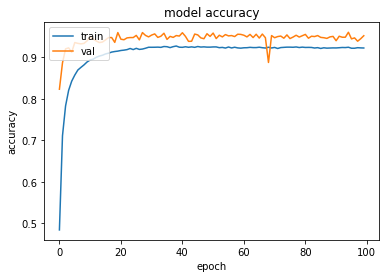

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

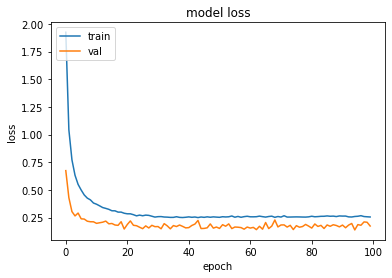

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# <span style= 'color:blue'><h1> Partie 2:prediction and rectangle draw (run it)</h1> </span>
---

In [4]:
model_path = 'model_v2'
print("Loading NN model...")
model = load_model(model_path)
print("Done")

Loading NN model...
Done


In [49]:
image_path = 'ex3.jpg'
image = cv2.imread(image_path)
img_pred=image.copy()

In [50]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
# initialize the list of contour bounding boxes and associated
# characters that we'll be OCR'ing
chars = []
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)
	# filter out bounding boxes, ensuring they are neither too small
	# nor too large
	if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
		# extract the character and threshold it to make the character
		# appear as *white* (foreground) on a *black* background, then
		# grab the width and height of the thresholded image
		roi = gray[y:y + h, x:x + w]
		thresh = cv2.threshold(roi, 0, 255,
			cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
		(tH, tW) = thresh.shape
		# if the width is greater than the height, resize along the
		# width dimension
		if tW > tH:
			thresh = imutils.resize(thresh, width=28)
		# otherwise, resize along the height
		else:
			thresh = imutils.resize(thresh, height=28)
            	# re-grab the image dimensions (now that its been resized)
		# and then determine how much we need to pad the width and
		# height such that our image will be 32x32
		(tH, tW) = thresh.shape
		dX = int(max(0, 28 - tW) / 2.0)
		dY = int(max(0, 28 - tH) / 2.0)
		# pad the image and force 32x32 dimensions
		padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
			left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
			value=(0, 0, 0))
		padded = cv2.resize(padded, (28, 28))
		# prepare the padded image for classification via our
		# handwriting OCR model
		padded = padded.astype("float32") / 255.0
		padded = np.expand_dims(padded, axis=-1)
		# update our list of characters that will be OCR'd
		chars.append((padded, (x, y, w, h)))

In [51]:
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")
preds = model.predict(chars)


In [52]:
labelNames = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"

In [53]:
# loop over the predictions and bounding box locations together
for (pred, (x, y, w, h)) in zip(preds, boxes):
	# find the index of the label with the largest corresponding
	# probability, then extract the probability and label
	i = np.argmax(pred)
	prob = pred[i]
	label = labelNames[i]
	# draw the prediction on the image
	print("[INFO] {} - {:.2f}%".format(label, prob * 100))
	cv2.rectangle(img_pred, (x, y), (x + w, y + h), (0, 255, 0), 2)
	cv2.putText(img_pred, label, (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)
	# show the image
	cv2.imshow("Image", img_pred)
	cv2.waitKey(0)

[INFO] R - 99.79%
[INFO] S - 98.38%
[INFO] P - 99.98%
[INFO] C - 86.17%
[INFO] D - 99.76%
[INFO] M - 48.31%
[INFO] Y - 99.97%
[INFO] 1 - 84.81%
[INFO] C - 97.63%
[INFO] M - 100.00%
[INFO] 1 - 90.42%
[INFO] T - 48.70%
[INFO] W - 98.77%
[INFO] N - 39.61%
[INFO] K - 98.67%
[INFO] B - 80.19%
[INFO] O - 42.01%
[INFO] Q - 90.55%
[INFO] B - 30.14%
[INFO] Y - 54.26%
[INFO] M - 41.13%
[INFO] 2 - 43.48%
[INFO] O - 77.00%
[INFO] O - 38.07%
[INFO] H - 28.75%
[INFO] U - 49.05%
[INFO] 1 - 77.46%
[INFO] 6 - 95.57%
[INFO] R - 89.64%
[INFO] C - 99.65%
[INFO] U - 97.90%
[INFO] P - 100.00%
[INFO] Y - 82.65%
[INFO] 5 - 37.39%
[INFO] Q - 69.13%
[INFO] P - 67.22%
[INFO] P - 99.97%
[INFO] Y - 91.81%
[INFO] 1 - 97.99%
[INFO] D - 67.68%
[INFO] B - 86.06%
[INFO] 4 - 54.26%
[INFO] M - 40.80%
[INFO] S - 96.34%
[INFO] 6 - 85.31%
[INFO] D - 60.22%
[INFO] B - 84.12%
[INFO] 1 - 99.84%
[INFO] Y - 100.00%
[INFO] B - 95.20%
[INFO] L - 30.65%
[INFO] B - 85.79%
[INFO] Y - 99.99%
[INFO] U - 38.63%
[INFO] W - 48.93%
[INFO] 

In [54]:
x=[]
y=[]
for cnt in cnts:
    for cn in cnt:
        x.append(cn[0][0])
        y.append(cn[0][1])


In [55]:
x_max,x_min=max(x),min(x)
y_max,y_min=max(y),min(y)

In [56]:
img_rect=image.copy()

In [57]:
cv2.rectangle(img_rect, (x_min, y_min), (x_max, y_max), (255,0,0), 2)
cv2.putText(img_rect,"HandWritten", (x_min,y_min-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0))
cv2.imshow("Image", img_rect)
cv2.waitKey(0)

-1